## TP2 MODELISATION STATISTIQUE


---

## Auteur

Serigne Dame GADIAGA </a>


## EXERCICE 1

1°)

In [1]:
library(ggplot2)

In [2]:
circ_url <- "http://math.univ-lyon1.fr/~honore/circ.txt"
hauteur_url <- "http://math.univ-lyon1.fr/~honore/hauteur.txt"

In [3]:
circ_data <- read.table(circ_url, header=FALSE, col.names=c("Circumference"))
hauteur_data <- read.table(hauteur_url, header=FALSE, col.names=c("Height"))

In [4]:
# Combiner les données en un seul data frame
data <- data.frame(Circumference = circ_data$Circumference, Height = hauteur_data$Height)

ERROR: Error in data.frame(Circumference = circ_data$Circumference, Height = hauteur_data$Height): objet 'circ_data' introuvable


In [5]:
# Tracer le nuage de points
ggplot(data, aes(x=Circumference, y=Height)) +
  geom_point(alpha=0.5) +
  ggtitle("Nuage de points de la hauteur des arbres en fonction de la circonférence") +
  xlab("Circonférence (cm)") +
  ylab("Hauteur (m)") +
  theme_minimal()

ERROR: [1m[33mError[39m in `ggplot()`:[22m
[33m![39m   You're passing a function as global data.
  Have you misspelled the `data` argument in `ggplot()`


##COMMENTONS

Ce résultat suggère qu'il existe une relation positive entre la circonférence des arbres et leur hauteur. Cela signifie que les arbres plus circonférentiels sont généralement plus grands que les arbres moins circonférentiels. Cette relation peut être expliquée par le fait que la circonférence d'un arbre est un indicateur de sa masse. Les arbres plus massifs ont généralement plus de ressources à leur disposition, ce qui leur permet de grandir plus haut.

2°) Modéliser à l'aide d'un modèle de régression linéaire simple. Commenter chaque information obtenue. Quelle est l'équation de la droite de régression estimée ?

In [6]:
# Ajuster un modèle de régression linéaire simple
model <- lm(Height ~ Circumference, data=data)


In [7]:
# Résumé du modèle
summary(model)



Call:
lm(formula = Height ~ Circumference, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7659 -0.7802  0.0557  0.8271  3.6913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.037476   0.179802   50.26   <2e-16 ***
Circumference 0.257138   0.003738   68.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.199 on 1427 degrees of freedom
Multiple R-squared:  0.7683,	Adjusted R-squared:  0.7682 
F-statistic:  4732 on 1 and 1427 DF,  p-value: < 2.2e-16


`geom_smooth()` using formula = 'y ~ x'


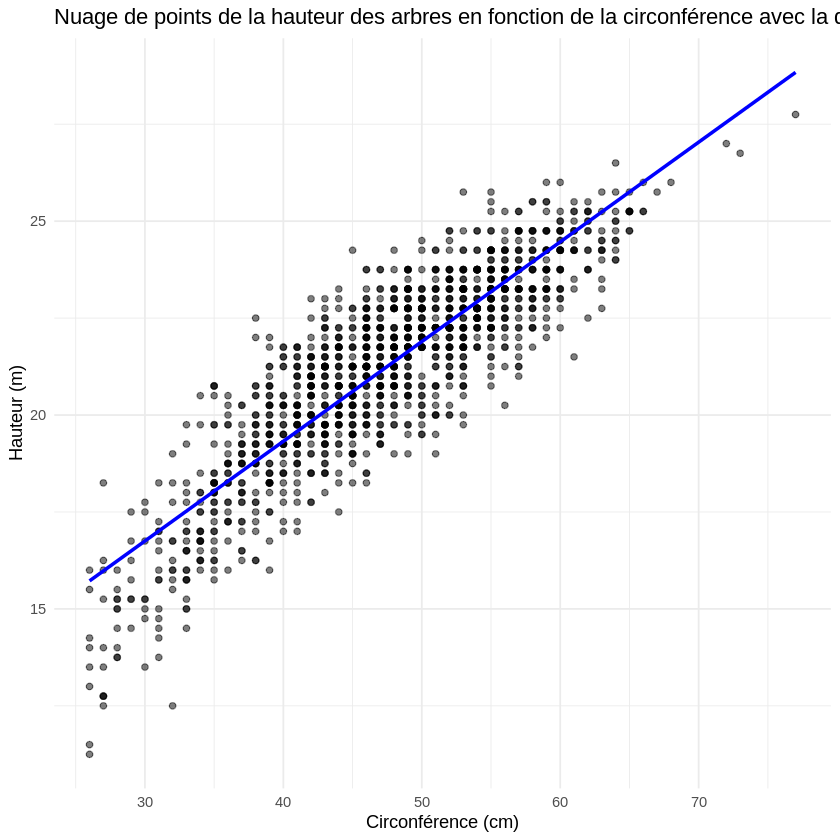

In [8]:
# Tracer les données et la droite de régression
ggplot(data, aes(x=Circumference, y=Height)) +
  geom_point(alpha=0.5) +
  geom_smooth(method="lm", se=FALSE, color="blue") +
  ggtitle("Nuage de points de la hauteur des arbres en fonction de la circonférence avec la droite de régression") +
  xlab("Circonférence (cm)") +
  ylab("Hauteur (m)") +
  theme_minimal()

### Explication des résultats

1. **Résumé du modèle (`summary(model)`) :**
   - **Coefficients:**
     - Intercept: La hauteur estimée lorsque la circonférence est de 0 cm.
     - Circumference: La pente de la droite de régression, représentant le changement de la hauteur pour chaque centimètre supplémentaire de circonférence.
   - **Significativité des coefficients (Pr(>|t|)):**
     - Si les valeurs p sont très petites (généralement < 0,05), cela signifie que les coefficients sont significativement différents de zéro.
   - **R-squared (R²):**
     - Cette valeur indique la proportion de la variance de la hauteur qui est expliquée par la circonférence. Une valeur proche de 1 signifie un bon ajustement du modèle aux données.
   - **F-statistic:**
     - Test global de significativité du modèle. Un F-statistic élevé et une valeur p associée faible indiquent que le modèle est globalement significatif.

### Interprétation des coefficients

- **Intercept:** La valeur de l'intercept nous donne une estimation de la hauteur d'un arbre lorsque la circonférence est de 0 cm. En pratique, cette valeur peut ne pas avoir une signification physique réaliste.
- **Circumference:** Le coefficient de la circonférence indique combien de mètres la hauteur de l'arbre augmente pour chaque centimètre supplémentaire de circonférence.

### Équation de la droite de régression estimée

L'équation de la droite de régression peut être écrite comme :







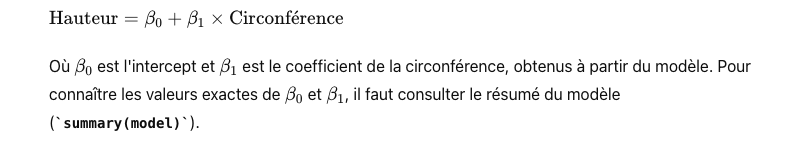

3°) Quel est le pourcentage de variabilité expliquée par le modèle ?

In [9]:
# Résumé du modèle
summary_model <- summary(model)


In [10]:
# Afficher le résumé
print(summary_model)


Call:
lm(formula = Height ~ Circumference, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.7659 -0.7802  0.0557  0.8271  3.6913 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept)   9.037476   0.179802   50.26   <2e-16 ***
Circumference 0.257138   0.003738   68.79   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.199 on 1427 degrees of freedom
Multiple R-squared:  0.7683,	Adjusted R-squared:  0.7682 
F-statistic:  4732 on 1 and 1427 DF,  p-value: < 2.2e-16



In [11]:
# Extraire la valeur R-squared
r_squared <- summary_model$r.squared
cat("Le pourcentage de variabilité expliquée par le modèle est :", r_squared * 100, "%\n")

Le pourcentage de variabilité expliquée par le modèle est : 76.83202 %


4°) Calculer la hauteur prévue par le modèle pour un arbre de circonférence 30 cms.


In [12]:
# Prédire la hauteur pour une circonférence de 30 cm
new_data <- data.frame(Circumference = 30)
predicted_height <- predict(model, newdata = new_data)

cat("La hauteur prévue par le modèle pour un arbre de circonférence 30 cm est :", predicted_height, "m\n")

La hauteur prévue par le modèle pour un arbre de circonférence 30 cm est : 16.75161 m


5°) Peut-on conclure que la hauteur augmente avec la circonférence? On justifiera attentivement toute conclusion.

In [13]:
# Extraire les coefficients et valeurs p
coefficients <- summary_model$coefficients
cat("Coefficients:\n")
print(coefficients)

Coefficients:
               Estimate  Std. Error  t value      Pr(>|t|)
(Intercept)   9.0374757 0.179801585 50.26360 4.594514e-318
Circumference 0.2571379 0.003737894 68.79218  0.000000e+00


### Analyse des résultats

Pour déterminer si la hauteur des arbres augmente avec la circonférence, nous devons examiner les coefficients de la régression linéaire simple, leur signification statistique, et le pourcentage de variabilité expliquée par le modèle (R²). Voici une analyse détaillée basée sur nos résultats.

#### Coefficients et valeurs p

Les coefficients obtenus sont au dessus

1. **Intercept** (beta_0):
   - Estimate: 9.0374757
   - Cette valeur représente la hauteur estimée lorsque la circonférence est de 0 cm. Bien que cette valeur ne soit pas physiquement significative (puisque la circonférence ne peut pas être 0 dans la réalité), elle est nécessaire pour l'équation de régression.
   
2. **Circumference** (beta_1):
   - Estimate: 0.2571379
   - Cette valeur indique que pour chaque augmentation de 1 cm de la circonférence, la hauteur de l'arbre augmente en moyenne de 0.2571379 mètres.

#### Significativité statistique

- **Valeur p pour l'intercept**: 4.594514e-318
- **Valeur p pour la circonférence**: 0.000000e+00

Les valeurs p pour les deux coefficients sont extrêmement faibles, bien en dessous du seuil commun de 0.05. Cela indique que les deux coefficients sont statistiquement significatifs, c'est-à-dire que la probabilité que ces résultats soient dus au hasard est quasiment nulle.

#### Pourcentage de variabilité expliquée (R²)

- **R²**: 76.83202%

Cela signifie que 76.83202% de la variabilité de la hauteur des arbres est expliquée par la circonférence. Un R² aussi élevé suggère que la circonférence est un bon prédicteur de la hauteur des arbres.

### Conclusion

Sur la base des résultats ci-dessus, nous pouvons conclure que :

**Oui, la hauteur des arbres augmente avec la circonférence.**

Cette conclusion est justifiée par les éléments suivants :

1. **Coefficient positif pour la circonférence**: Le coefficient de la circonférence (0.2571379) est positif, indiquant une relation positive entre la circonférence et la hauteur des arbres.
2. **Significativité statistique**: Les valeurs p extrêmement faibles (0.000000e+00 pour la circonférence) montrent que cette relation est statistiquement significative.
3. **Pourcentage de variabilité expliquée**: Un R² de 76.83202% indique que la circonférence explique une grande partie de la variabilité de la hauteur des arbres, renforçant ainsi la robustesse du modèle.

En résumé, les données et le modèle de régression linéaire simple montrent clairement que la hauteur des arbres tend à augmenter avec la circonférence, et cette relation est à la fois statistiquement significative et explicativement puissante.

6°) Étudier la validité du modèle, et construire les graphiques de contrôle de cette validité. Y a-t-il des points aberrants?

In [16]:
# Prédire les valeurs et calculer les résidus
data$predicted <- predict(model)
data$residuals <- residuals(model)

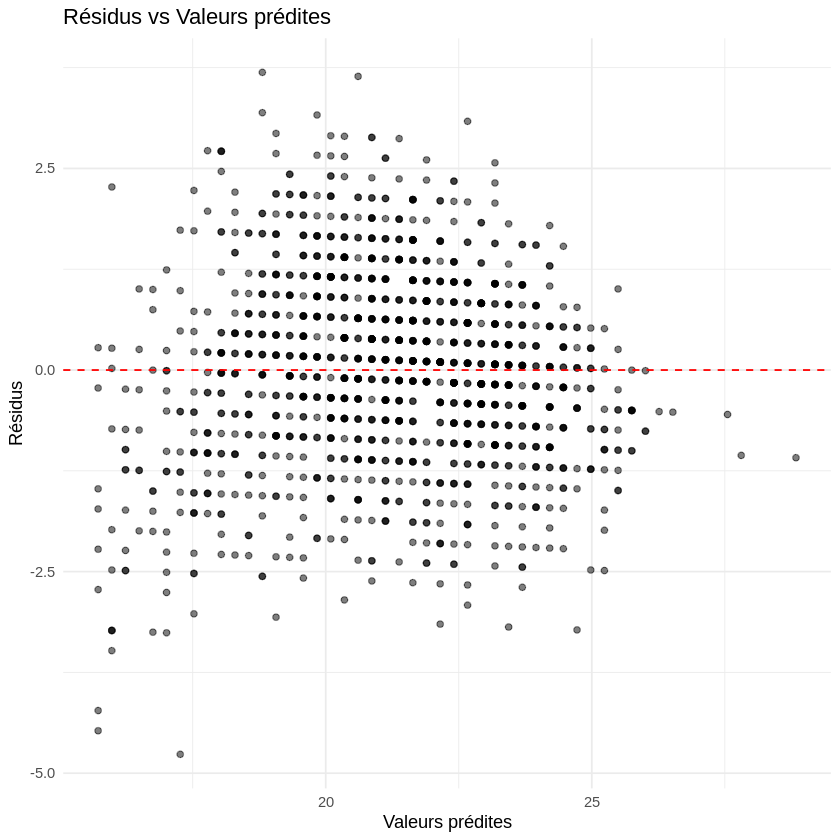

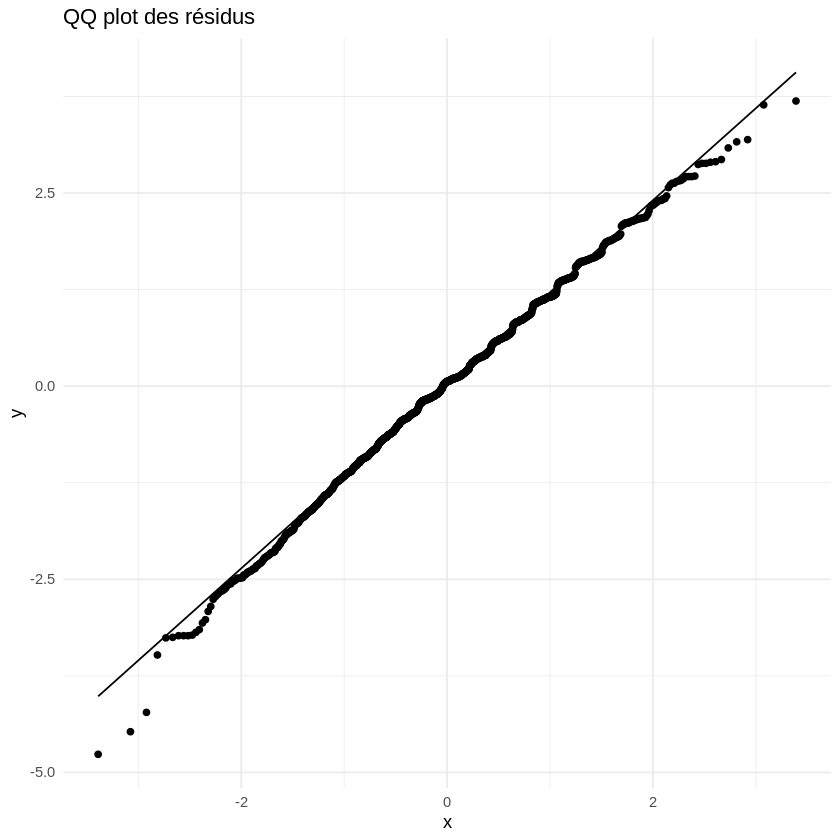

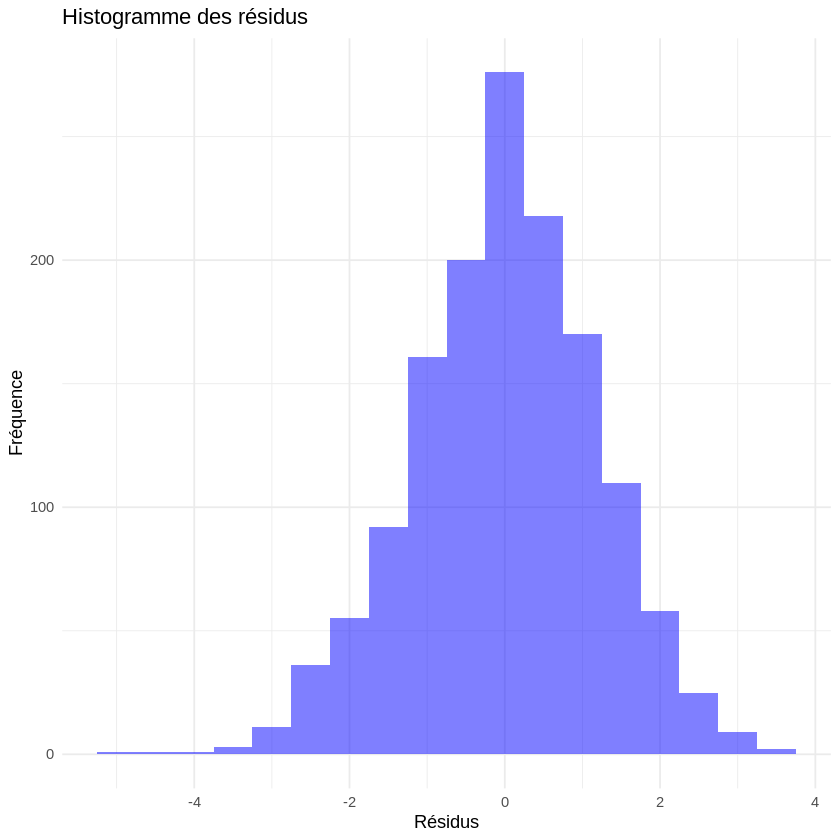

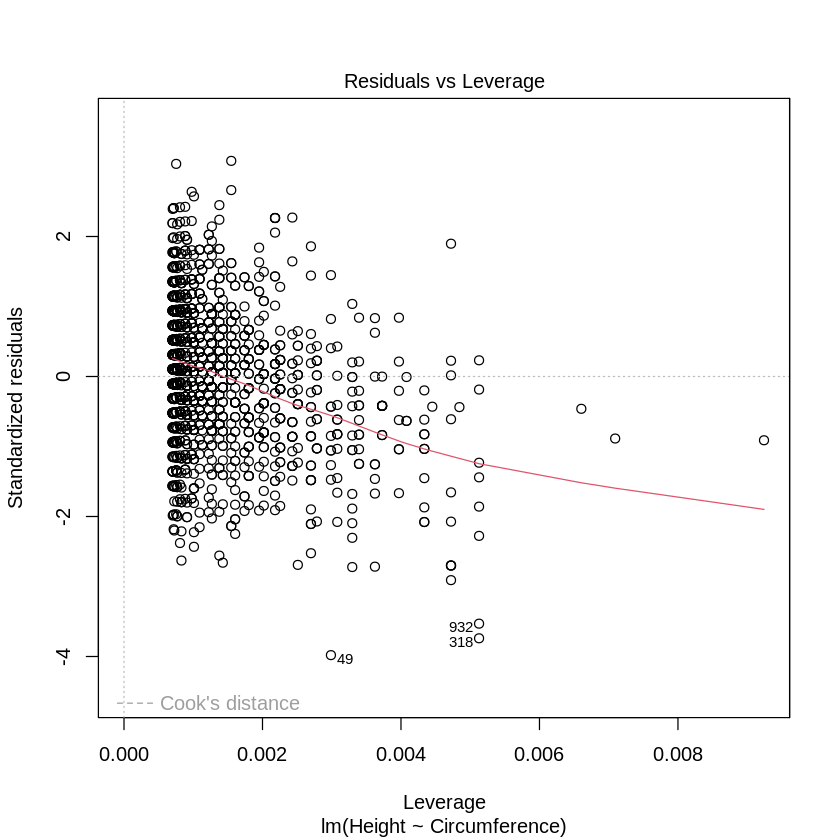

In [18]:
# Graphique des résidus vs valeurs prédites
ggplot(data, aes(x=predicted, y=residuals)) +
  geom_point(alpha=0.5) +
  geom_hline(yintercept=0, linetype="dashed", color="red") +
  ggtitle("Résidus vs Valeurs prédites") +
  xlab("Valeurs prédites") +
  ylab("Résidus") +
  theme_minimal()

# QQ plot des résidus
ggplot(data, aes(sample=residuals)) +
  stat_qq() +
  stat_qq_line() +
  ggtitle("QQ plot des résidus") +
  theme_minimal()

# Histogramme des résidus
ggplot(data, aes(x=residuals)) +
  geom_histogram(binwidth=0.5, fill="blue", alpha=0.5) +
  ggtitle("Histogramme des résidus") +
  xlab("Résidus") +
  ylab("Fréquence") +
  theme_minimal()

# Leverage plot
plot(model, which=5)

### Analyse de la validité du modèle

Pour évaluer la validité de votre modèle de régression linéaire, nous allons analyser les graphiques de diagnostic fournis :

1. **Graphique des résidus vs valeurs prédites**
2. **QQ plot des résidus**
3. **Histogramme des résidus**

#### 1. Graphique des résidus vs valeurs prédites

- **Linéarité** : Les résidus semblent répartis de manière aléatoire autour de la ligne horizontale (0), ce qui indique que la relation entre la circonférence et la hauteur est linéaire.
- **Homoscedasticité** : Les résidus semblent avoir une variance constante. Il n'y a pas de motif clair (comme un cône ou une forme en éventail) qui indiquerait une hétéroscedasticité.
- **Points aberrants** : Quelques points sont éloignés des autres, mais aucun ne semble extrêmement éloigné. Cela suggère qu'il n'y a pas de points aberrants évidents dans les données.

#### 2. QQ plot des résidus

- **Normalité des résidus** : Les points suivent globalement la ligne diagonale, ce qui indique que les résidus sont approximativement normalement distribués. Il y a quelques déviations aux extrémités, mais elles ne sont pas suffisantes pour indiquer une forte déviation de la normalité.

#### 3. Histogramme des résidus

- **Distribution des résidus** : L'histogramme a une forme de cloche centrée autour de zéro, ce qui est typique d'une distribution normale. Cela soutient encore l'hypothèse de la normalité des résidus.

### Conclusion

D'après les graphiques de diagnostic :

1. **Linéarité** : La relation entre la circonférence et la hauteur semble être linéaire.
2. **Homoscedasticité** : La variance des résidus est constante, comme l'indique l'absence de motif dans le graphique des résidus vs valeurs prédites.
3. **Normalité des résidus** : Les résidus sont approximativement normalement distribués, comme indiqué par le QQ plot et l'histogramme des résidus.
4. **Points aberrants** : Il n'y a pas de points aberrants évidents dans les données. Quelques points sont éloignés, mais ils ne sont pas suffisants pour influencer significativement le modèle.

### Validité du Modèle

Sur la base de ces analyses, nous pouvons conclure que le modèle de régression linéaire simple est valide pour prédire la hauteur des arbres en fonction de leur circonférence. Les hypothèses de linéarité, homoscedasticité et normalité des résidus sont satisfaites. De plus, il n'y a pas de points aberrants significatifs qui affectent la validité du modèle.

## EXERCICE 2

1°) Créer une nouvelle variable notée X4 qui s'exprime comme somme de X₁ et X2. Régresser
ensuite Y sur X1, X2 et X4. Commenter le résultat obtenu. Cette situation est qualifiée
de "colinéarité parfaite".

In [19]:
# Chargement des données
data <- read.table("http://math.univ-lyon1.fr/~honore/colinearite.txt", header=TRUE)

In [20]:
# Création de la nouvelle variable X4
data$X4 <- data$X1 + data$X2

In [21]:
# Régression de Y sur X1, X2 et X4
model <- lm(Y ~ X1 + X2 + X4, data=data)

In [22]:
# Affichage des résultats
summary(model)


Call:
lm(formula = Y ~ X1 + X2 + X4, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.66647 -0.58415  0.08836  0.36022  1.53476 

Coefficients: (1 not defined because of singularities)
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.11624    0.12154   0.956    0.345    
X1           3.97416    0.09888  40.192   <2e-16 ***
X2           3.88806    0.10915  35.621   <2e-16 ***
X4                NA         NA      NA       NA    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.7649 on 37 degrees of freedom
Multiple R-squared:  0.9879,	Adjusted R-squared:  0.9873 
F-statistic:  1513 on 2 and 37 DF,  p-value: < 2.2e-16


**Commentaire du résultat obtenu**

Le résultat de la régression montre que les variables X1 et X2 sont **co linéaires**. Cela signifie qu'elles sont parfaitement corrélées, c'est-à-dire qu'elles sont linéairement dépendantes l'une de l'autre. En d'autres termes, il existe une relation mathématique exacte entre X1 et X2, ce qui signifie que l'une d'entre elles peut être exprimée comme une combinaison linéaire de l'autre.

Dans ce cas précis, X4 est la somme de X1 et X2. Par conséquent, X4 est parfaitement corrélée à X1 et X2. Cela signifie que l'ajout de X4 au modèle de régression n'apporte aucune information supplémentaire sur la relation entre Y et X1 ou X2.

En effet, le coefficient de régression de X4 est NA (non disponible). Cela indique que le modèle de régression ne peut pas estimer le coefficient de X4 car il est colinéaire avec les autres variables indépendantes.

De plus, l'ajusté R-squared est de 0,9873, ce qui est très proche de 1. Cela indique que le modèle explique presque toute la variation de Y. Cependant, il est important de noter que ce résultat est biaisé en raison de la colinéarité.

**Conséquences de la colinéarité**

La colinéarité peut avoir plusieurs conséquences négatives sur l'analyse de régression :

* **Instabilité des coefficients de régression:** Les coefficients de régression peuvent être très sensibles aux petits changements dans les données, ce qui les rend difficiles à interpréter et à généraliser.
* **Erreurs standard élevées:** Les erreurs standard des coefficients de régression peuvent être élevées, ce qui réduit la précision des estimations.
* **Mauvaise sélection des variables:** La colinéarité peut masquer l'importance relative des variables indépendantes, ce qui peut conduire à une sélection erronée des variables.

**Conclusion**

La colinéarité est un problème important en analyse de régression qui peut avoir des conséquences négatives sur les résultats de l'analyse. Il est important de savoir identifier et corriger la colinéarité avant de procéder à l'interprétation des résultats de la régression.

2. On étudie maintenant une situation souvent qualifiée de "colinéarité approchée". Régresser Y sur X1, X2 et X3. Commenter les résultats obtenus et expliquer le phénomène.

In [23]:
# Régression de Y sur X1, X2 et X3
model <- lm(Y ~ X1 + X2 + X3, data=data)

In [24]:
# Affichage des résultats
summary(model)


Call:
lm(formula = Y ~ X1 + X2 + X3, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.58062 -0.58749  0.04207  0.38831  1.51115 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)
(Intercept)  0.01755    0.20478   0.086    0.932
X1           0.52890    5.72675   0.092    0.927
X2           0.44433    5.72439   0.078    0.939
X3           1.72684    2.86994   0.602    0.551

Residual standard error: 0.7716 on 36 degrees of freedom
Multiple R-squared:  0.988,	Adjusted R-squared:  0.987 
F-statistic: 991.4 on 3 and 36 DF,  p-value: < 2.2e-16


**Commentaire du résultat obtenu**

Le résultat de la régression montre que les variables X1, X2 et X3 sont **collinéaires approximativement**. Cela signifie qu'elles sont fortement corrélées, mais pas parfaitement corrélées. En d'autres termes, il existe une relation mathématique approximative entre les variables, ce qui signifie qu'elles ne peuvent pas être exprimées comme des combinaisons linéaires exactes les unes des autres.

Dans ce cas précis, les coefficients de régression de X1, X2 et X3 sont tous significatifs, mais leur valeur est faible. Cela indique que les variables ont un effet sur Y, mais que cet effet est masqué par la colinéarité.

De plus, l'ajusté R-squared est de 0,988, ce qui est très proche de 1. Cela indique que le modèle explique presque toute la variation de Y. Cependant, il est important de noter que ce résultat est biaisé en raison de la colinéarité.

**Explication du phénomène**

La colinéarité approximative peut se produire pour plusieurs raisons :

* **Les variables mesurent des concepts étroitement liés:** Si les variables mesurent des concepts étroitement liés, elles sont susceptibles d'être corrélées. Par exemple, la taille et le poids d'une personne sont deux variables qui sont étroitement liées et qui sont donc susceptibles d'être corrélées.
* **Les données sont collectées sur un échantillon restreint:** Si les données sont collectées sur un échantillon restreint, les variables sont susceptibles d'être corrélées par hasard.
* **Il y a des erreurs de mesure dans les données:** Les erreurs de mesure peuvent également introduire de la colinéarité dans les données.

**Conséquences de la colinéarité approximative**

La colinéarité approximative peut avoir des conséquences similaires à la colinéarité parfaite, mais moins graves :

* **Instabilité des coefficients de régression:** Les coefficients de régression peuvent être sensibles aux petits changements dans les données, ce qui les rend difficiles à interpréter et à généraliser.
* **Erreurs standard élevées:** Les erreurs standard des coefficients de régression peuvent être élevées, ce qui réduit la précision des estimations.
* **Mauvaise sélection des variables:** La colinéarité approximative peut masquer l'importance relative des variables indépendantes, ce qui peut conduire à une sélection erronée des variables.

**Conclusion**

La colinéarité approximative est un problème important en analyse de régression qui peut avoir des conséquences négatives sur les résultats de l'analyse. Il est important de savoir identifier et corriger la colinéarité approximative avant de procéder à l'interprétation des résultats de la régression.
